# 背景
**<font size=5>Enefit - Predict Energy Behavior of Prosumers**  
    The goal of the competition is to create an energy prediction model of prosumers to reduce energy imbalance costs.  
    This competition aims to tackle the issue of energy imbalance, a situation where the energy expected to be used doesn't line up with the actual energy used or produced. Prosumers, who both consume and generate energy, contribute a large part of the energy imbalance. Despite being only a small part of all consumers, their unpredictable energy use causes logistical and financial problems for the energy companies.

# 读取数据

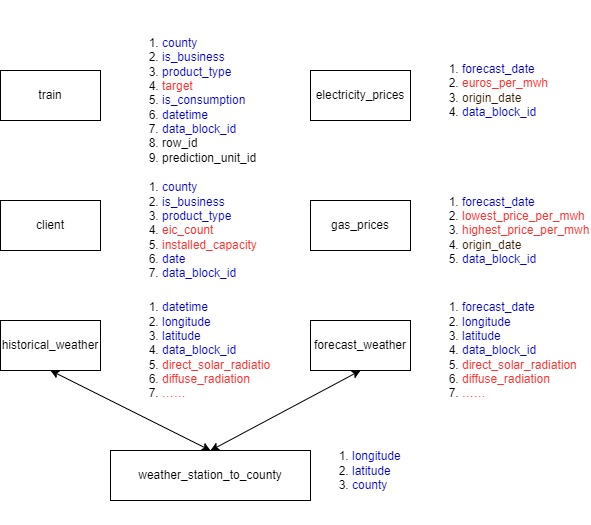

In [7]:
import pandas as pd
import seaborn as sns

In [2]:
# 载入train数据，parse_dates参数将datetime列标记为时间
train = pd.read_csv('../data/train.csv', parse_dates=['datetime'])
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


将时间特征拆分以利于分析

In [4]:
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021,9,1,0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021,9,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021,9,1,0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021,9,1,0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021,9,1,0


In [5]:
train.corr().loc['target']

county               -0.098594
is_business           0.162962
product_type          0.174963
target                1.000000
is_consumption        0.204345
datetime              0.037881
data_block_id         0.037853
row_id                0.037907
prediction_unit_id   -0.108852
year                  0.038689
month                -0.019436
day                  -0.003247
hour                  0.017672
Name: target, dtype: float64

C:\Users\zhongchen\AppData\Local\Temp\ipykernel_21460\1212298839.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['target'])


<Axes: xlabel='target', ylabel='Density'>

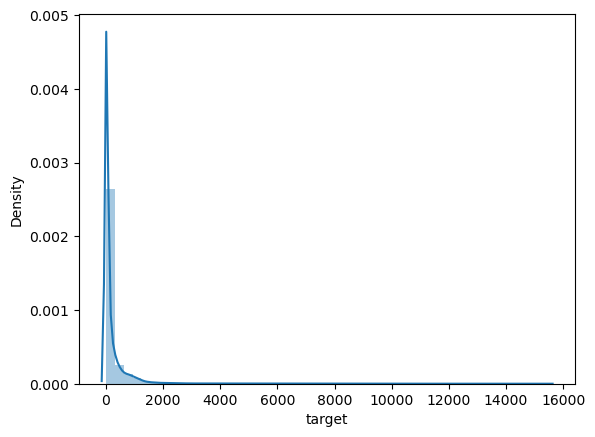

In [8]:
# target的分布特征
sns.distplot(a=train['target'])

# 电量与时间的关联性

## 消费电量与小时的关联
判断一个地区的一天中，消费电量和小时的相关性，以地区0，1，2，3, 4, 5为例, 指定data_block_id = 1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train_corr_hour = train[(train['data_block_id'] == 1) & (train['is_consumption'] == 1)]

### 非商业消费电量与小时的关联
指定**is_business=0**

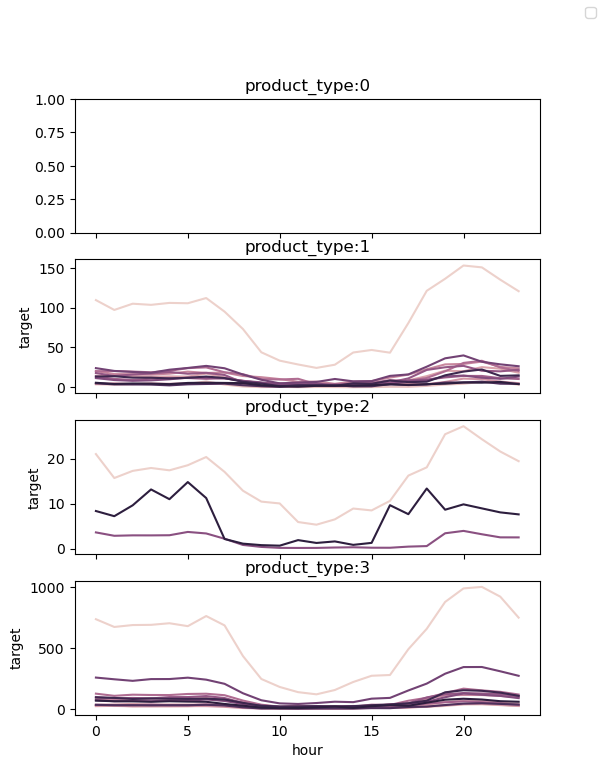

In [8]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour[train_corr_hour['is_business'] == 0]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

### 商业消费电量与小时的关联
指定**is_business=1**

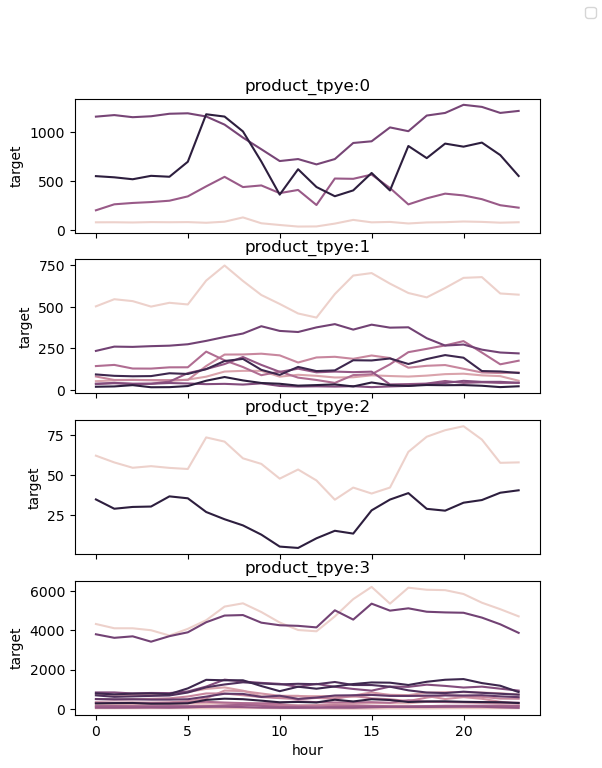

In [9]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour[train_corr_hour['is_business'] == 1]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county', ax=ax, legend=False)
    axsub.set_title('product_tpye:'+str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

## 生产电量与小时的关联

### 非商业生产电量与小时的关联
指定is_business=0

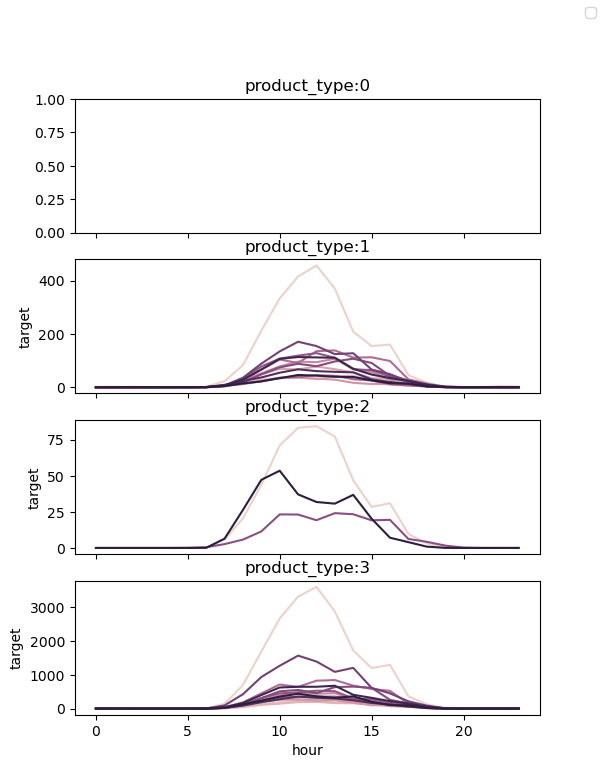

In [10]:
train_corr_hour2 = train[(train['data_block_id'] == 1) & (train['is_consumption'] == 0)]
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour2[train_corr_hour2['is_business'] == 0]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

### 商业生产电量与小时的关联
指定is_business=1

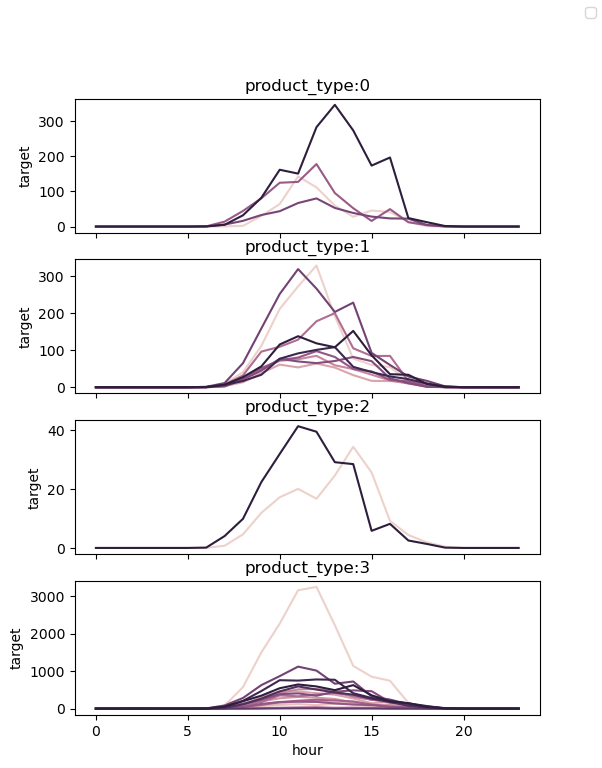

In [11]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour2[train_corr_hour2['is_business'] == 1]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

## 消费电量与月份的关联

In [12]:
# 取每天的消费电量均值
train_corr_month = train[train['is_consumption'] == 1]
train_corr_month_iscp = train_corr_month.groupby(['is_business', 'month']).mean()

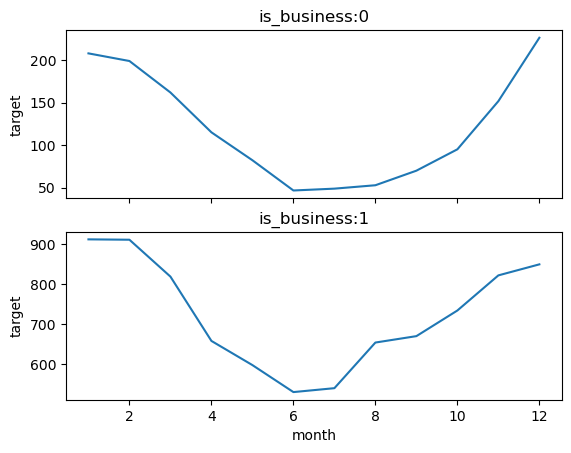

In [13]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=train_corr_month_iscp.loc[i], x='month', y='target', ax=ax)
    ax.set_title('is_business:'+str(i))

## 生产电量与月份的关联

In [14]:
train_corr_month = train[train['is_consumption'] == 0]
train_corr_month_nocp = train_corr_month.groupby(['is_business', 'month']).mean()

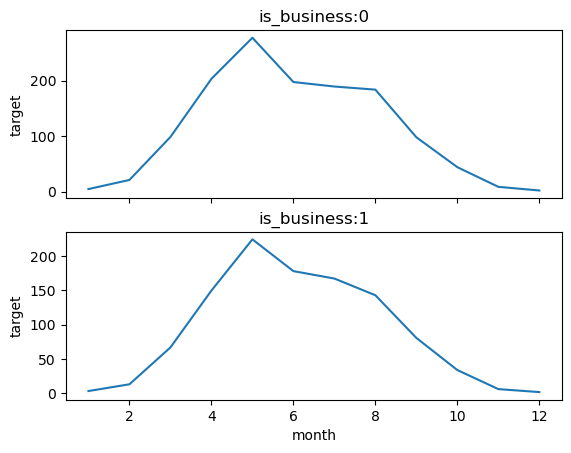

In [15]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=train_corr_month_nocp.loc[i], x='month', y='target', ax=ax)
    ax.set_title('is_business:'+str(i))

# 电量与天然气价格的相关性

## 生产电量与天然气价格相关性
先筛选train中的生产数据，即is_consumption=0, 再按照data_block_id分组，计算每天的target均值。随后与天然气价格拼接，计算天然气价格与每日生产电量的相关性

In [16]:
# 读取天然气价格数据
gas_prices = pd.read_csv('../data/gas_prices.csv', parse_dates=['forecast_date', 'origin_date'])
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [17]:
train_corr_gas_nocp = train[train['is_consumption'] == 0]
train_corr_gas_nocp = train_corr_gas_nocp.groupby(['is_business', 'data_block_id']).mean()

In [18]:
# 生产非商业用电与天然气价格的相关性
concat_train_and_gas_nocp_nobs = pd.merge(left=train_corr_gas_nocp.loc[0], right=gas_prices, on='data_block_id')
concat_train_and_gas_nocp = concat_train_and_gas_nocp_nobs[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
corr_nocp_nobs = concat_train_and_gas_nocp.corr()['target']
corr_nocp_nobs

target                   1.000000
lowest_price_per_mwh     0.038585
highest_price_per_mwh    0.028195
Name: target, dtype: float64

In [19]:
# 生产商业用电与天然气价格的相关性
concat_train_and_gas_nocp_isbs = pd.merge(left=train_corr_gas_nocp.loc[1], right=gas_prices, on='data_block_id')
concat_train_and_gas_nocp = concat_train_and_gas_nocp_isbs[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
corr_nocp_isbs = concat_train_and_gas_nocp.corr()['target']
corr_nocp_isbs

target                   1.000000
lowest_price_per_mwh     0.055341
highest_price_per_mwh    0.044362
Name: target, dtype: float64

## 消费电量与天然气价格的相关性
筛选train中的消费数据，并按照天进行分组计算均值，再计算与天然气价格的相关性

In [20]:
train_corr_gas_cp = train[train['is_consumption'] == 1]
train_corr_gas_cp = train_corr_gas_cp.groupby(by=['is_business', 'data_block_id']).mean()

In [21]:
# 消费非商业用电与天然气价格的相关性
concat_train_and_gas_iscp_nobs = pd.merge(left=train_corr_gas_cp.loc[0], right=gas_prices, on='data_block_id')
concat_train_and_gas_iscp = concat_train_and_gas_iscp_nobs[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
corr_iscp_nobs = concat_train_and_gas_iscp.corr()['target']
corr_iscp_nobs

target                   1.000000
lowest_price_per_mwh    -0.312758
highest_price_per_mwh   -0.286415
Name: target, dtype: float64

In [22]:
# 消费商业用电与天然气价格的相关性
concat_train_and_gas_iscp_isbs = pd.merge(left=train_corr_gas_cp.loc[1], right=gas_prices, on='data_block_id')
concat_train_and_gas_iscp = concat_train_and_gas_iscp_isbs[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
corr_iscp_isbs = concat_train_and_gas_iscp.corr()['target']
corr_iscp_isbs

target                   1.000000
lowest_price_per_mwh    -0.218970
highest_price_per_mwh   -0.193933
Name: target, dtype: float64

<Axes: xlabel='datetime', ylabel='lowest_price_per_mwh'>

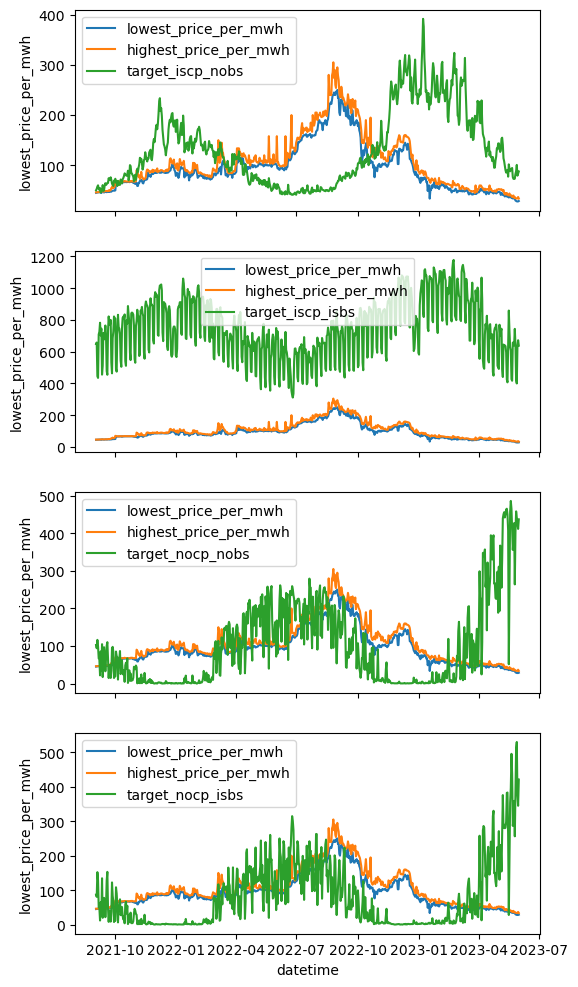

In [23]:
# 画折线图
figure, axes = plt.subplots(4, 1, figsize=(6,12), sharex=True)
for ax in axes.ravel():
    sns.lineplot(data=concat_train_and_gas_iscp_isbs, x='datetime', y='lowest_price_per_mwh', label='lowest_price_per_mwh', ax=ax)
    sns.lineplot(data=concat_train_and_gas_iscp_isbs, x='datetime', y='highest_price_per_mwh', label='highest_price_per_mwh', ax=ax)
    ax.legend(bbox_to_anchor=(1, 0.5))
sns.lineplot(data=concat_train_and_gas_iscp_nobs, x='datetime', y='target', label='target_iscp_nobs', ax=axes[0])
sns.lineplot(data=concat_train_and_gas_iscp_isbs, x='datetime', y='target', label='target_iscp_isbs', ax=axes[1])
sns.lineplot(data=concat_train_and_gas_nocp_nobs, x='datetime', y='target', label='target_nocp_nobs', ax=axes[2])
sns.lineplot(data=concat_train_and_gas_nocp_isbs, x='datetime', y='target', label='target_nocp_isbs', ax=axes[3])


<Axes: >

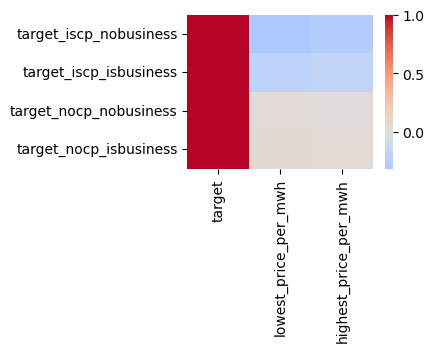

In [24]:
# 画热力图
plt.figure(figsize=(3,2))
corr_iscp_nobs.rename('target_iscp_nobusiness', inplace=True)
corr_iscp_isbs.rename('target_iscp_isbusiness', inplace=True)
corr_nocp_nobs.rename('target_nocp_nobusiness', inplace=True)
corr_nocp_isbs.rename('target_nocp_isbusiness', inplace=True)
corr_data = pd.concat([corr_iscp_nobs, corr_iscp_isbs, corr_nocp_nobs, 
                       corr_nocp_isbs], axis=1)
sns.heatmap(corr_data.T, cmap='coolwarm', center=0)

**总结电量与天然气价格关系：**综合来看，天然气价格对消费电量有负的影响，对生产电量影响较小，生产电量受月份的影响比较大。

# 电量与装机容量的相关性

In [25]:
# 将train和client按照product_type,county,is_business和data_block_id合并
client = pd.read_csv('../data/client.csv', parse_dates=['date'])
train_client = pd.merge(left=train, right=client, on=['product_type', 'county', 'is_business', 'data_block_id'])
train_client.head(3)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour,eic_count,installed_capacity,date
0,0,0,1,0.793,0,2021-09-03 00:00:00,2,5856,0,2021,9,3,0,108,952.89,2021-09-01
1,0,0,1,107.129,1,2021-09-03 00:00:00,2,5857,0,2021,9,3,0,108,952.89,2021-09-01
2,0,0,1,2.106,0,2021-09-03 01:00:00,2,5978,0,2021,9,3,1,108,952.89,2021-09-01


## 消费电量与装机容量的相关性
以county0为例

In [26]:
train_client_cp = train_client[(train_client['is_consumption'] == 1) & (train_client['county'] == 0)]
train_client_cp.head(3)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour,eic_count,installed_capacity,date
1,0,0,1,107.129,1,2021-09-03 00:00:00,2,5857,0,2021,9,3,0,108,952.89,2021-09-01
3,0,0,1,81.920,1,2021-09-03 01:00:00,2,5979,0,2021,9,3,1,108,952.89,2021-09-01
5,0,0,1,96.193,1,2021-09-03 02:00:00,2,6101,0,2021,9,3,2,108,952.89,2021-09-01


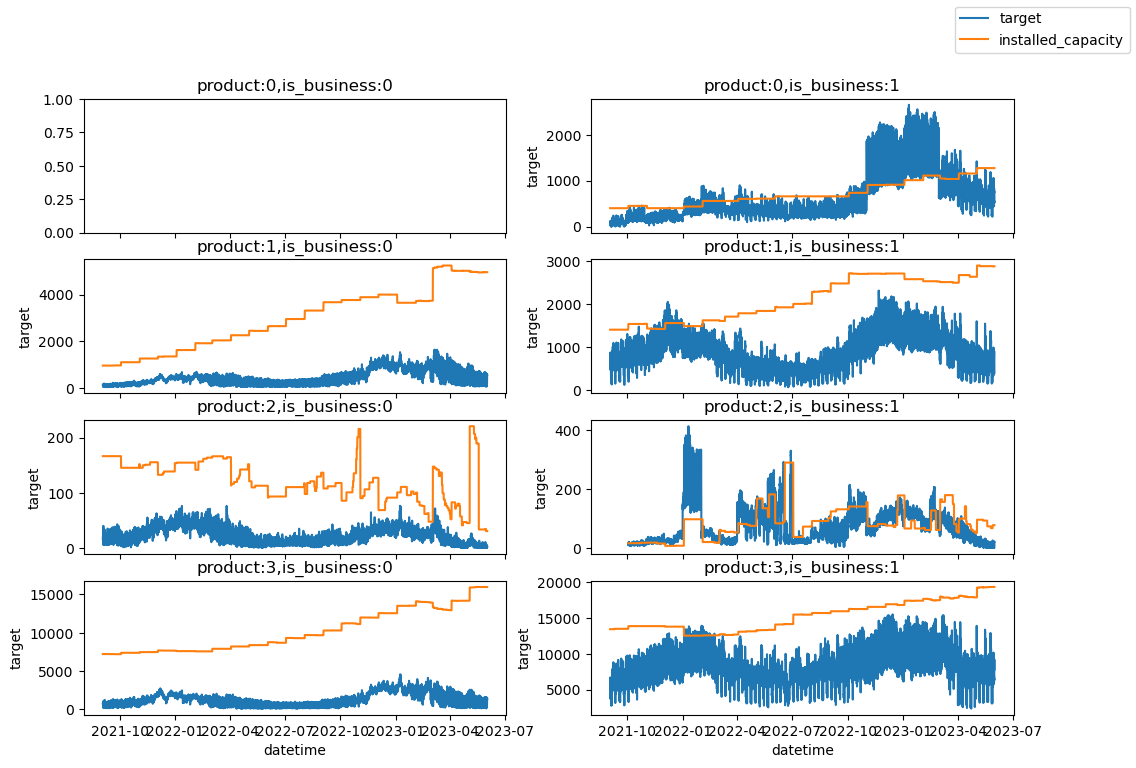

In [27]:
figure, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 8))
for j in range(2):
    for i in range(4):
        data = train_client_cp[(train_client_cp['is_business'] == j) & (train_client_cp['product_type'] == i)]
        ax = axes[i, j]
        sns.lineplot(data=data, x='datetime', y='target', ax=ax, label='target', legend=False)
        sns.lineplot(data=data, x='datetime', y='installed_capacity', ax=ax, label='installed_capacity', legend=False)
        ax.set_title("product:"+str(i)+',is_business:'+str(j))
handels, labels = axes[3, 1].get_legend_handles_labels()
figure.legend(handels, labels)
# # 左侧为消费商业电量，右侧为消费非商业电量

In [28]:
corr_iscp = train_client_cp.corr().loc['target']
corr_iscp

county                     NaN
is_business           0.318166
product_type          0.496960
target                1.000000
is_consumption             NaN
datetime              0.060294
data_block_id         0.060252
row_id                0.060524
prediction_unit_id   -0.168632
year                  0.057580
month                -0.023018
day                  -0.009849
hour                  0.026458
eic_count             0.237681
installed_capacity    0.811588
date                  0.060252
Name: target, dtype: float64

## 生产电量与装机容量的相关性

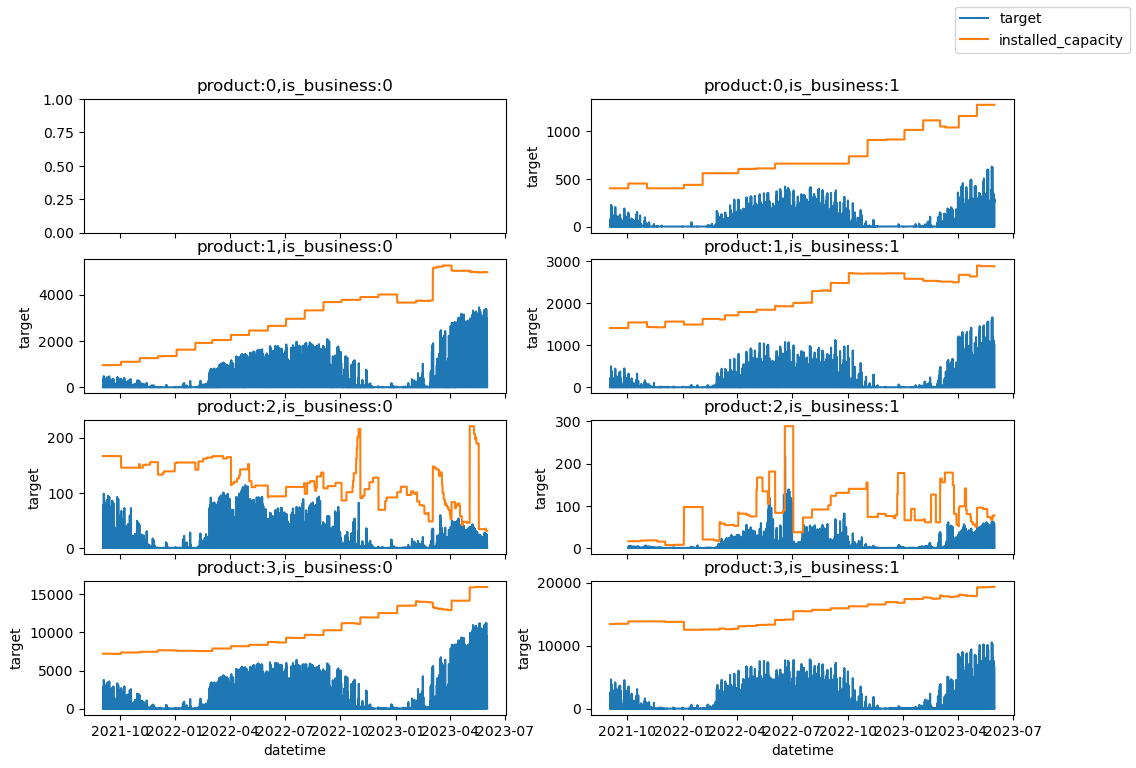

In [29]:
train_client_nocp = train_client[(train_client['is_consumption'] == 0) & (train_client['county'] == 0)]
figure, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 8))
for j in range(2):
    for i in range(4):
        data = train_client_nocp[(train_client_nocp['is_business'] == j) & (train_client_nocp['product_type'] == i)]
        ax = axes[i, j]
        sns.lineplot(data=data, x='datetime', y='target', ax=ax, label='target', legend=False)
        sns.lineplot(data=data, x='datetime', y='installed_capacity', ax=ax, label='installed_capacity', legend=False)
        ax.set_title("product:"+str(i)+',is_business:'+str(j))
handels, labels = axes[3, 1].get_legend_handles_labels()
figure.legend(handels, labels)
# 左侧为生产商业电量，右侧为生产非商业电量

In [30]:
corr_nocp = train_client_nocp.corr().loc['target']
corr_nocp

county                     NaN
is_business          -0.071353
product_type          0.233148
target                1.000000
is_consumption             NaN
datetime              0.111877
data_block_id         0.111796
row_id                0.111462
prediction_unit_id   -0.100126
year                  0.111449
month                -0.051998
day                   0.002916
hour                  0.051326
eic_count             0.316501
installed_capacity    0.327701
date                  0.111796
Name: target, dtype: float64

<Axes: >

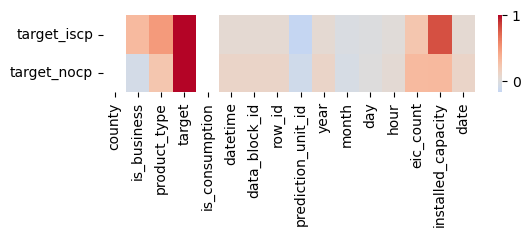

In [31]:
plt.figure(figsize=(6,1))
corr_iscp.rename('target_iscp', inplace=True)
corr_nocp.rename('target_nocp', inplace=True)
corr_data = pd.concat([corr_iscp, corr_nocp], axis=1)
sns.heatmap(corr_data.T, cmap='coolwarm', center=0)

**电量与装机容量的相关性总结：**消费电量与装机容量具有比较强的相关性，生产电量与装机容量的相关性比较弱，但是从时间序列来看，与季节的关系比较强

# 电量与电力价格的相关性

In [32]:
electricity_prices = pd.read_csv('../data/electricity_prices.csv', parse_dates=['forecast_date'])
electricity_prices.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


## 消费电量与电力价格的相关性
以county=0, product_type=1为例

In [33]:
# 筛选county=1, product_type=1
train_corr_electricity_cp = train[(train['is_consumption'] == 1) & (train['county'] == 0) & (train['product_type'] == 1)]
# 按照is_business,datetime分组
train_corr_electricity_cp = train_corr_electricity_cp.groupby(by=['is_business', 'datetime']).mean()
train_corr_electricity_cp

county  product_type   target  \
is_business datetime                                             
0           2021-09-01 00:00:00     0.0           1.0   96.590   
            2021-09-01 01:00:00     0.0           1.0   77.691   
            2021-09-01 02:00:00     0.0           1.0   91.594   
            2021-09-01 03:00:00     0.0           1.0   87.955   
            2021-09-01 04:00:00     0.0           1.0   88.184   
...                                 ...           ...      ...   
1           2023-05-31 19:00:00     0.0           1.0  761.060   
            2023-05-31 20:00:00     0.0           1.0  827.122   
            2023-05-31 21:00:00     0.0           1.0  808.137   
            2023-05-31 22:00:00     0.0           1.0  870.630   
            2023-05-31 23:00:00     0.0           1.0  889.251   

                                 is_consumption  data_block_id     row_id  \
is_business datetime                                                        
0           2021-09-01 00:00:00             1.0            0.0        1.0   
            2021-09-01 01:00:00             1.0            0.0      123.0   
            2021-09-01 02:00:00             1.0            0.0      245.0   
            2021-09-01 03:00:00             1.0            0.0      367.0   
            2021-09-01 04:00:00             1.0            0.0      489.0   
...                                         ...            ...        ...   
1           2023-05-31 19:00:00             1.0          637.0  2017711.0   
            2023-05-31 20:00:00             1.0          637.0  2017841.0   
            2023-05-31 21:00:00             1.0          637.0  2017971.0   
            2023-05-31 22:00:00             1.0          637.0  2018101.0   
            2023-05-31 23:00:00             1.0          637.0  2018231.0   

                                 prediction_unit_id    year  month   day  hour  
is_business datetime                                                            
0           2021-09-01 00:00:00                 0.0  2021.0    9.0   1.0   0.0  
            2021-09-01 01:00:00                 0.0  2021.0    9.0   1.0   1.0  
            2021-09-01 02:00:00                 0.0  2021.0    9.0   1.0   2.0  
            2021-09-01 03:00:00                 0.0  2021.0    9.0   1.0   3.0  
            2021-09-01 04:00:00                 0.0  2021.0    9.0   1.0   4.0  
...                                             ...     ...    ...   ...   ...  
1           2023-05-31 19:00:00                 4.0  2023.0    5.0  31.0  19.0  
            2023-05-31 20:00:00                 4.0  2023.0    5.0  31.0  20.0  
            2023-05-31 21:00:00                 4.0  2023.0    5.0  31.0  21.0  
            2023-05-31 22:00:00                 4.0  2023.0    5.0  31.0  22.0  
            2023-05-31 23:00:00                 4.0  2023.0    5.0  31.0  23.0  

[30624 rows x 11 columns]

### 非商业消费电量与电力价格的关系

In [34]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity_cp_nobs = pd.merge(left=train_corr_electricity_cp.loc[0], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
concat_train_and_electricity_cp_nobs

,county,product_type,target,is_consumption,data_block_id_x,row_id,prediction_unit_id,year,month,day,hour,forecast_date,euros_per_mwh,origin_date,data_block_id_y
0,0.0,1.0,96.590,1.0,0.0,1.0,0.0,2021.0,9.0,1.0,0.0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,0.0,1.0,77.691,1.0,0.0,123.0,0.0,2021.0,9.0,1.0,1.0,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,0.0,1.0,91.594,1.0,0.0,245.0,0.0,2021.0,9.0,1.0,2.0,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,0.0,1.0,87.955,1.0,0.0,367.0,0.0,2021.0,9.0,1.0,3.0,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,0.0,1.0,88.184,1.0,0.0,489.0,0.0,2021.0,9.0,1.0,4.0,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15281,0.0,1.0,309.297,1.0,636.0,2014583.0,0.0,2023.0,5.0,30.0,19.0,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,0.0,1.0,454.405,1.0,636.0,2014713.0,0.0,2023.0,5.0,30.0,20.0,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,0.0,1.0,533.400,1.0,636.0,2014843.0,0.0,2023.0,5.0,30.0,21.0,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,0.0,1.0,609.816,1.0,636.0,2014973.0,0.0,2023.0,5.0,30.0,22.0,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [35]:
# 求target和电力价格的相关性
corr_iscp_nobs = concat_train_and_electricity_cp_nobs[['target', 'euros_per_mwh']].corr()['target']
concat_train_and_electricity_cp_nobs[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.008052
euros_per_mwh,-0.008052,1.000000


### 商业消费电量与电力价格的关系

In [36]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity_cp_isbs = pd.merge(left=train_corr_electricity_cp.loc[1], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
# 求target和电力价格的相关性
corr_iscp_isbs = concat_train_and_electricity_cp_isbs[['target', 'euros_per_mwh']].corr()['target']
concat_train_and_electricity_cp_isbs[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.00000,0.17022
euros_per_mwh,0.17022,1.00000


## 生产电量与电力价格的相关性
以county=0, product_type=1为例

In [37]:
# 筛选county=1, product_type=1
train_corr_electricity_nocp = train[(train['is_consumption'] == 0) & (train['county'] == 0) & (train['product_type'] == 1)]
train_corr_electricity_nocp = train_corr_electricity_nocp.groupby(by=['is_business', 'datetime']).mean()
train_corr_electricity_nocp

county  product_type   target  \
is_business datetime                                             
0           2021-09-01 00:00:00     0.0           1.0    0.713   
            2021-09-01 01:00:00     0.0           1.0    1.132   
            2021-09-01 02:00:00     0.0           1.0    0.490   
            2021-09-01 03:00:00     0.0           1.0    0.496   
            2021-09-01 04:00:00     0.0           1.0    0.149   
...                                 ...           ...      ...   
1           2023-05-31 19:00:00     0.0           1.0  126.947   
            2023-05-31 20:00:00     0.0           1.0   27.563   
            2023-05-31 21:00:00     0.0           1.0    5.091   
            2023-05-31 22:00:00     0.0           1.0    0.028   
            2023-05-31 23:00:00     0.0           1.0    0.000   

                                 is_consumption  data_block_id     row_id  \
is_business datetime                                                        
0           2021-09-01 00:00:00             0.0            0.0        0.0   
            2021-09-01 01:00:00             0.0            0.0      122.0   
            2021-09-01 02:00:00             0.0            0.0      244.0   
            2021-09-01 03:00:00             0.0            0.0      366.0   
            2021-09-01 04:00:00             0.0            0.0      488.0   
...                                         ...            ...        ...   
1           2023-05-31 19:00:00             0.0          637.0  2017710.0   
            2023-05-31 20:00:00             0.0          637.0  2017840.0   
            2023-05-31 21:00:00             0.0          637.0  2017970.0   
            2023-05-31 22:00:00             0.0          637.0  2018100.0   
            2023-05-31 23:00:00             0.0          637.0  2018230.0   

                                 prediction_unit_id    year  month   day  hour  
is_business datetime                                                            
0           2021-09-01 00:00:00                 0.0  2021.0    9.0   1.0   0.0  
            2021-09-01 01:00:00                 0.0  2021.0    9.0   1.0   1.0  
            2021-09-01 02:00:00                 0.0  2021.0    9.0   1.0   2.0  
            2021-09-01 03:00:00                 0.0  2021.0    9.0   1.0   3.0  
            2021-09-01 04:00:00                 0.0  2021.0    9.0   1.0   4.0  
...                                             ...     ...    ...   ...   ...  
1           2023-05-31 19:00:00                 4.0  2023.0    5.0  31.0  19.0  
            2023-05-31 20:00:00                 4.0  2023.0    5.0  31.0  20.0  
            2023-05-31 21:00:00                 4.0  2023.0    5.0  31.0  21.0  
            2023-05-31 22:00:00                 4.0  2023.0    5.0  31.0  22.0  
            2023-05-31 23:00:00                 4.0  2023.0    5.0  31.0  23.0  

[30624 rows x 11 columns]

### 非商业生产电量与电力价格的关系

In [38]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity_nocp_nobs = pd.merge(left=train_corr_electricity_nocp.loc[0], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
concat_train_and_electricity_nocp_nobs.head()

,county,product_type,target,is_consumption,data_block_id_x,row_id,prediction_unit_id,year,month,day,hour,forecast_date,euros_per_mwh,origin_date,data_block_id_y
0,0.0,1.0,0.713,0.0,0.0,0.0,0.0,2021.0,9.0,1.0,0.0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,0.0,1.0,1.132,0.0,0.0,122.0,0.0,2021.0,9.0,1.0,1.0,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,0.0,1.0,0.490,0.0,0.0,244.0,0.0,2021.0,9.0,1.0,2.0,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,0.0,1.0,0.496,0.0,0.0,366.0,0.0,2021.0,9.0,1.0,3.0,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,0.0,1.0,0.149,0.0,0.0,488.0,0.0,2021.0,9.0,1.0,4.0,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [39]:
corr_nocp_nobs = concat_train_and_electricity_nocp_nobs[['target', 'euros_per_mwh']].corr()['target']
concat_train_and_electricity_nocp_nobs[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.040161
euros_per_mwh,-0.040161,1.000000


### 商业生产电量与电力价格的关系

In [40]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity_nocp_isbs = pd.merge(left=train_corr_electricity_nocp.loc[1], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
corr_nocp_isbs = concat_train_and_electricity_nocp_isbs[['target', 'euros_per_mwh']].corr()['target']
concat_train_and_electricity_nocp_isbs[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.061221
euros_per_mwh,-0.061221,1.000000


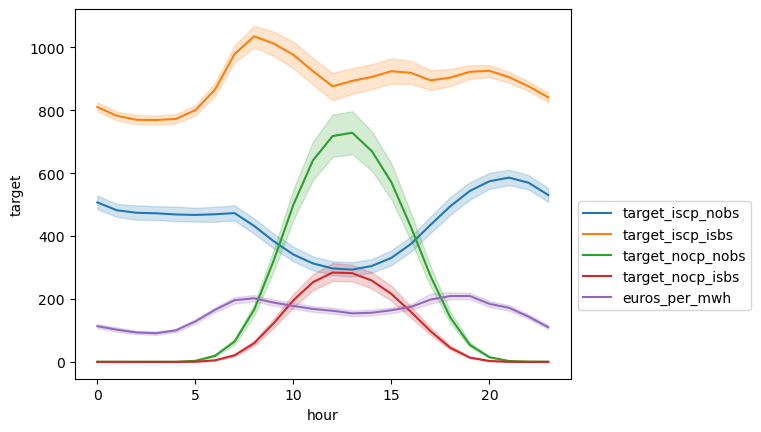

In [41]:
# 画折线图
sns.lineplot(data=concat_train_and_electricity_cp_nobs, x='hour', y='target', label='target_iscp_nobs')
sns.lineplot(data=concat_train_and_electricity_cp_isbs, x='hour', y='target', label='target_iscp_isbs')
sns.lineplot(data=concat_train_and_electricity_nocp_nobs, x='hour', y='target', label='target_nocp_nobs')
sns.lineplot(data=concat_train_and_electricity_nocp_isbs, x='hour', y='target', label='target_nocp_isbs')
sns.lineplot(data=concat_train_and_electricity_cp_nobs, x='hour', y='euros_per_mwh', label='euros_per_mwh')
plt.legend(bbox_to_anchor=(1, 0.5))

<Axes: >

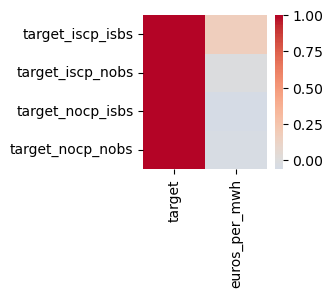

In [42]:
# 画热力图
plt.figure(figsize=(2,2))
corr_iscp_isbs.rename('target_iscp_isbs', inplace=True)
corr_iscp_nobs.rename('target_iscp_nobs', inplace=True)
corr_nocp_isbs.rename('target_nocp_isbs', inplace=True)
corr_nocp_nobs.rename('target_nocp_nobs', inplace=True)
corr_data = pd.concat([corr_iscp_isbs, corr_iscp_nobs, corr_nocp_isbs, corr_nocp_nobs], axis=1)
sns.heatmap(corr_data.T, cmap='coolwarm', center=0)

**电量与电力价格的相关性总结：** 生产和消费电量与电力价格在线性上为弱相关，但是非线性上看，中午电力价格高时，消费降低，生产增加